Note: This is a draft report for our analysis therefore we have not illustrated our work and headings with detailed descriptions. This draft report would serve as a lessons learned register for our final project report. 

In [1]:
# Draft Package for loading
import numpy as np # a library for handling large multi-dimensional array and matrices. 
import pandas as pd # For data manipulation and analysis.
import plotly.figure_factory as ff 
import matplotlib.pyplot as plt # Plotting library for python programming language.
import seaborn as sns # Visualize our random distributions.
from sklearn.linear_model import LogisticRegression # For running logistic regression model.
from sklearn.model_selection import train_test_split # Splitting dataset into training and testing sets. 
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D


Using TensorFlow backend.


In [414]:
# Loading our datasets.
df = pd.read_csv("heart.csv") # We are reading our data.

In [415]:
# Having a look at the f rows of our datsets.
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [416]:
# A check on the null values (if any)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

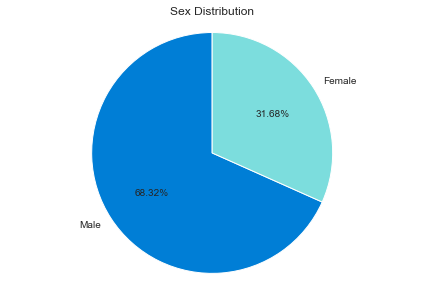

In [417]:
# Sex distribution of all patients
labels_dict_sex = {0:'Female',1:'Male'}
labels_sex = data['sex'].value_counts().rename(index=labels_dict_sex).index
values_sex = data['sex'].value_counts().values
colors_sex = ['#007ED6','#7CDDDD']
plt.pie(values_sex,explode=None,labels=labels_sex,colors=colors_sex,shadow=False,
        startangle=90,autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Sex Distribution')

C:\Users\Abhay\.conda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution')

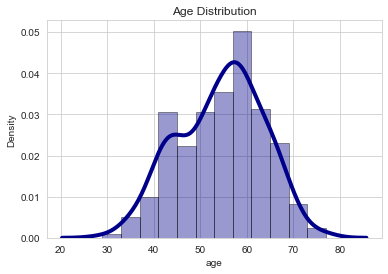

In [418]:
# Histograph for chest pain type distribution 
sns.distplot(data['age'],hist=True,kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Age Distribution')

Text(0.5, 1.0, 'Chest_pain_type Distribution')

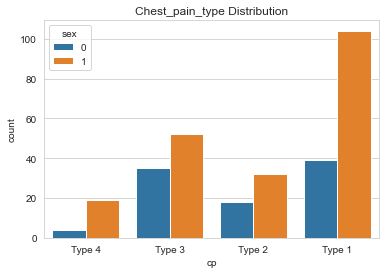

In [419]:
# Bar graph for chest pain type distribution
data['cp'].replace(0,'Type 1',inplace=True)
data['cp'].replace(1,'Type 2',inplace=True)
data['cp'].replace(2,'Type 3',inplace=True)
data['cp'].replace(3,'Type 4',inplace=True)
sns.countplot(x=data['cp'],hue=data['sex'])
plt.title('Chest_pain_type Distribution')

Text(0.5, 1.0, 'Target Distribution')

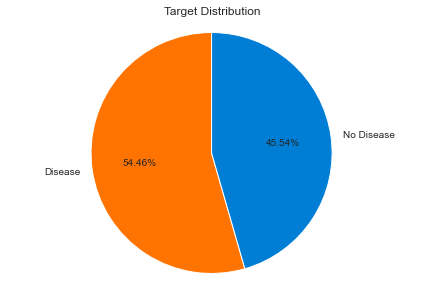

In [420]:
# Pie plot for target distribution
labels_dict_target = {0:'No Disease',1:'Disease'}
labels_target = data['target'].value_counts().rename(index=labels_dict_target).index
values_target = data['target'].value_counts().values
colors_target = ['#FF7300','#007ED6']
plt.pie(values_target,explode=None,labels=labels_target,colors=colors_target,shadow=False,
        startangle=90,autopct='%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Target Distribution')

In [421]:
# The distribution of Serum Cholesterol
hist_data = [data['chol']]
group_labels = ['serum_cholesterol'] 
colors = ['#007ED6']
fig = ff.create_distplot(hist_data, group_labels=group_labels, colors=colors,
                         bin_size=10, show_rug=False)
fig.update_layout(width=700, title_text='Serum Cholesterol Distribution')
fig.show()

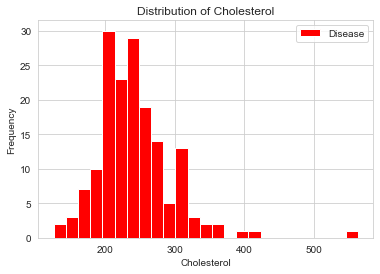

In [422]:
ch1 = data[data["target"] == 1]["chol"]

bar_width = 0.25
plt.hist(ch1, color = "red", bins=25, rwidth=1, label="Disease")
plt.title("Distribution of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.legend()
plt.show() 

### Creating a dummy variables.

In [423]:
a = pd.get_dummies(df['cp'], prefix = "cp") # cp is a categorical variable, we turn it into a dummy variables.
b = pd.get_dummies(df['thal'], prefix = "thal") # thal is a categorical variable, we turn it into a dummy variables.
c = pd.get_dummies(df['slope'], prefix = "slope") # slope is a categorical variable, we turn it into a dummy variables.

In [424]:
frames = [df, a, b, c] # defining the frames with a dummy variables.
df = pd.concat(frames, axis = 1) # Using concat function to create our dataframes.
df.head() # Having a look at the dataframe with new dummy variables.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [425]:
df = df.drop(columns = ['cp', 'thal', 'slope']) # Dropping our categorical variables for our analysis.
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [426]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [427]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [428]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0) # Training and testing  sets

In [429]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

### Logistic regression.

In [430]:
#initialize the data
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01) # weight is 0.01 and bias is 0.
    bias = 0.0
    return weight,bias

In [431]:
#defining the frame Using the sigmoid function.
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z)) # A formula for sigmoid function. 
    return y_head

In [432]:
# Determining the accuracy using Sklearn Logistic regression. 
# Note: We tried to reduce and increase the testing set percentages but we obtained lesser accuracies.
# Splitting the datasets into 80% training and 20% testing provides us the maximum accuracies.
accuracies = {}

lr = LogisticRegression(random_state = 47) # Logistic regression function.
lr.fit(x_train.T,y_train.T) # Determining accuracy using sklearn.
acc = lr.score(x_test.T,y_test.T)*100 # Determination of accuracies.

accuracies['Logistic Regression'] = acc 
print("Test Accuracy {:.2f}%".format(acc)) # Having a view at our results.

Test Accuracy 86.89%


#### This shows that our model works with 86.89% accuracy.

### K Nearest Neighbor 

In [433]:
# Determining the accuracy using K Nearest Neighbors. 
# Note: We tried to reduce and increase the value of K but we obtained lesser accuracies.
# The highest accuracy we have obtained when we used n_neighbor (K) = 4. 
from sklearn.neighbors import KNeighborsClassifier # Using sklearn library to import KNN Classifiers.
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(x_train.T, y_train.T) # Fitting the training sets in knn classifier. 
prediction = knn.predict(x_test.T) # Predicting the testing accuracies.

print("{} NN Score: {:.2f}%".format(3, knn.score(x_test.T, y_test.T)*100)) # Having a check on our results.

3 NN Score: 85.25%


#### This shows that our model for KNN works with 88.52% accuracies when we use k=3,7,8.

### SVM Algorithm. 

In [434]:
# Determining the accuracy using SVM algorithm. 
# Note: We tried to reduce and increase the value of random state but we obtained same accuracies.
from sklearn.svm import SVC # Using sklearn library to import Support vector machine algorithm.
svm = SVC(random_state = 47) # Random state choosen to be 47.  
svm.fit(x_train.T, y_train.T) # fitting the training sets into svm algorithm.

acc = svm.score(x_test.T,y_test.T)*100 # Predicting the testing score. 
accuracies['SVM'] = acc # Determination of accuracies.
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc)) # Having a few at our results. 

Test Accuracy of SVM Algorithm: 88.52%


#### This shows that our model for SVM works with 88.52% accuracies.

### Naive Bayes Algorithm. 

In [435]:
# Determining the accuracy using Naive Bayes algorithm. .
from sklearn.naive_bayes import GaussianNB # Using sklearn library to import naive bayes algorithm.
nb = GaussianNB() # Defining nb. 
nb.fit(x_train.T, y_train.T)  # fitting the training sets into naive bayes algorithm.
acc = nb.score(x_test.T,y_test.T)*100 # Predicting the testing score.
accuracies['Naive Bayes'] = acc # Determination of accuracies
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))  # Having a few at our results. 

Accuracy of Naive Bayes: 86.89%


#### This shows that our model for Naive Bayes works with 86.89% accuracies.

### Decision Tree Algorithm. 

In [436]:
# Determining the accuracy using Decision Tree algorithm. 
from sklearn.tree import DecisionTreeClassifier # Using sklearn library to import Decision Tree Classifiers.
dtc = DecisionTreeClassifier(random_state = 47) # Defining the decision tree classifiers. 
dtc.fit(x_train.T, y_train.T) # fitting the training sets into decision tree classifiers.
acc = dtc.score(x_test.T, y_test.T)*100 # Predicting the testing score.
accuracies['Decision Tree'] = acc # Determination of accuracies
print("Decision Tree Test Accuracy {:.2f}%".format(acc))  # Having a few at our results. 

Decision Tree Test Accuracy 78.69%


#### This shows that our model for decision tree works with 77.05% accuracies.

### Random Forest Classifiers.

In [437]:
# Determining the accuracies using the random forest classifiers. 
from sklearn.ensemble import RandomForestClassifier # Using sklearn library to import Random Forest Classifiers.
rf = RandomForestClassifier(n_estimators = 100, random_state = 47) # Defining the random forest classifiers.
rf.fit(x_train.T, y_train.T) # fitting the training sets into decision tree classifiers.

acc = rf.score(x_test.T,y_test.T)*100# Predicting the testing score.
accuracies['Random Forest'] = acc# Determination of accuracies
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc)) # Having a few at our results. 

Random Forest Algorithm Accuracy Score : 85.25%


#### This shows that our model for Random forest classifier works with 86.89% accuracies.

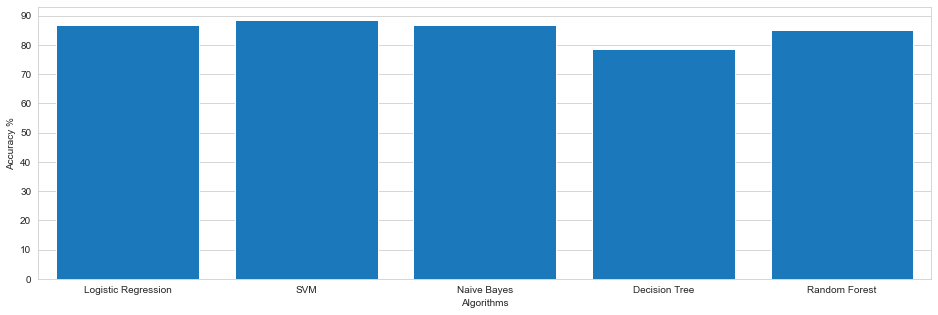

In [438]:
### Compairing all the accuracies and models.
sns.set_style("whitegrid")
plt.figure(figsize=(16,5)) # Determining the size of the figures. 
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %") # Plotting the values in the y axis labels.
plt.xlabel("Algorithms") # Plotting the values in the x axis labels.
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors) # Depicting the values using bar plot.
plt.show() # Having a view at our plots. 

#### References...
- https://www.hindawi.com/journals/misy/2018/3860146/
- https://arxiv.org/ftp/arxiv/papers/1909/1909.00489.pdf
- https://www.geeksforgeeks.org/heart-disease-prediction-using-ann/
- https://www.groundai.com/project/on-deep-neural-networks-for-detecting-heart-disease/1

In [439]:
#### Creation of Confusion matrix.
y_head_lr = lr.predict(x_test.T) # Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3) # Keeping n neighbors = 3 because we have obtained maximum accurcay.
knn3.fit(x_train.T, y_train.T) # Fitting the model.
y_head_knn = knn3.predict(x_test.T) # K Nearest Neighbor Y head
y_head_svm = svm.predict(x_test.T) # Support vector machine y head.
y_head_nb = nb.predict(x_test.T)  # Naive Bayes y head.
y_head_dtc = dtc.predict(x_test.T)  # Decision tree y head.
y_head_rf = rf.predict(x_test.T) # Random Forest Y head

In [440]:
from sklearn.metrics import confusion_matrix #Importing confusion matrix from Sk Learn.

cm_lr = confusion_matrix(y_test,y_head_lr) # Logistic Regression Confusion matrix
cm_knn = confusion_matrix(y_test,y_head_knn) # KNN Confusion matrix
cm_svm = confusion_matrix(y_test,y_head_svm) # SVM Confusion matrix
cm_nb = confusion_matrix(y_test,y_head_nb) #Naive Bayes Confusion matrix
cm_dtc = confusion_matrix(y_test,y_head_dtc) # Decision tree confusion matrix
cm_rf = confusion_matrix(y_test,y_head_rf) # Random forest Confusion matrix

<function matplotlib.pyplot.show(close=None, block=None)>

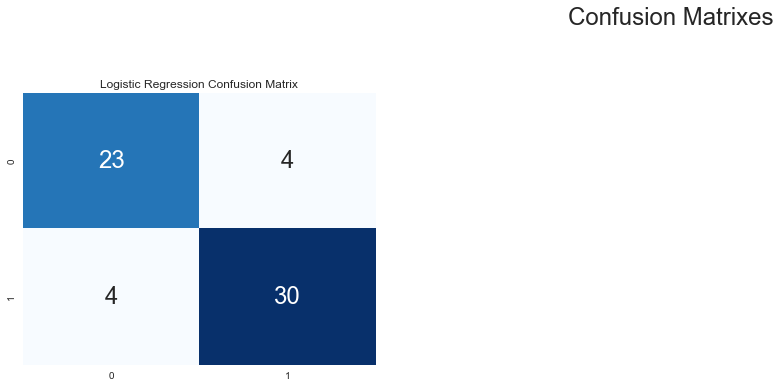

In [441]:
#Confusion matrix for logistic regression.
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix") # Title of Confusion matrix
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}) # Display of plot.
plt.show #Having a view at our matrix

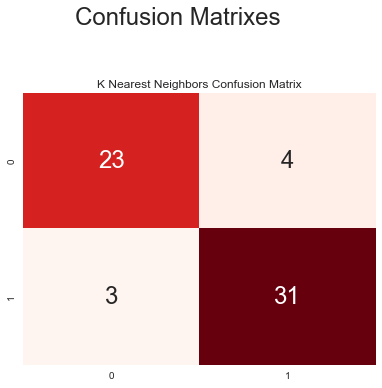

In [442]:
# Confusion matrix for KNN. 
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix") # Title of Confusion matrix
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24}) # Plot Display
plt.show() # Having a look at the plot

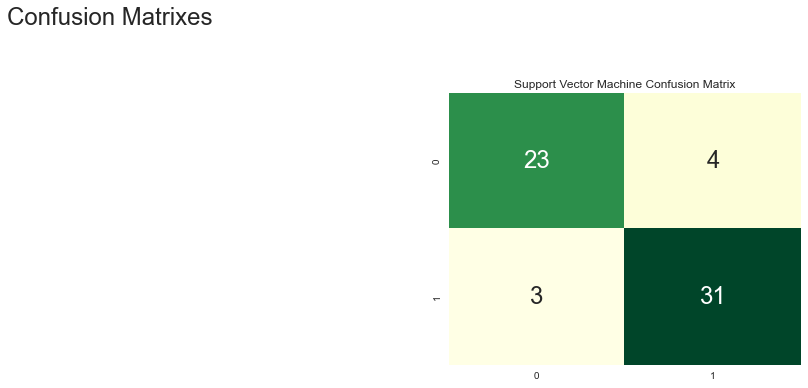

In [443]:
#Confusion matrix for Support vector machine
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix") # Plot Title
sns.heatmap(cm_svm,annot=True,cmap="YlGn",fmt="d",cbar=False, annot_kws={"size": 24}) # Plot display
plt.show()

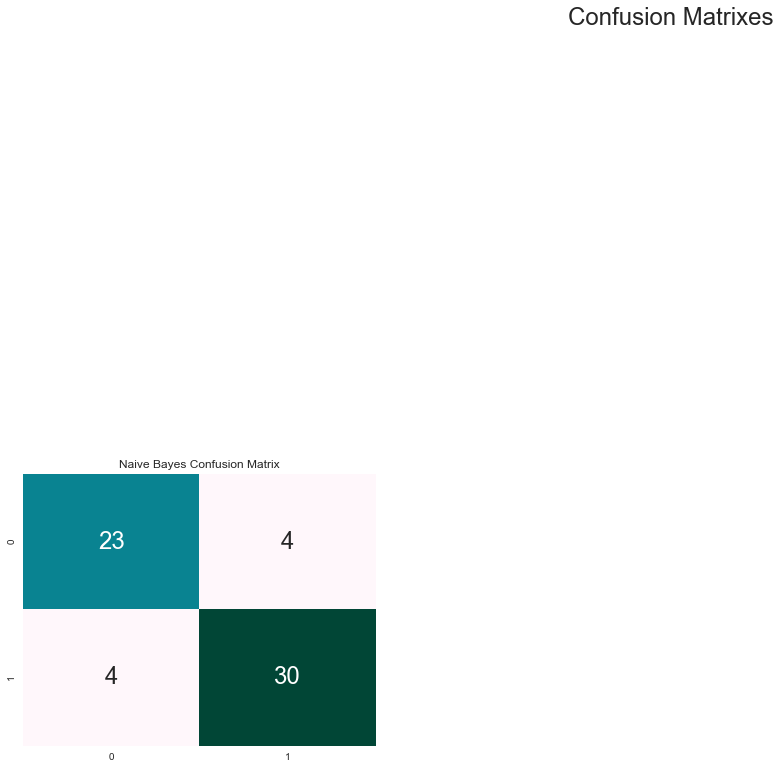

In [444]:
#Confusion matrix for Naive Bayes
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix") # Plot Title
sns.heatmap(cm_nb,annot=True,cmap="PuBuGn",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show() # Having a look at the plot

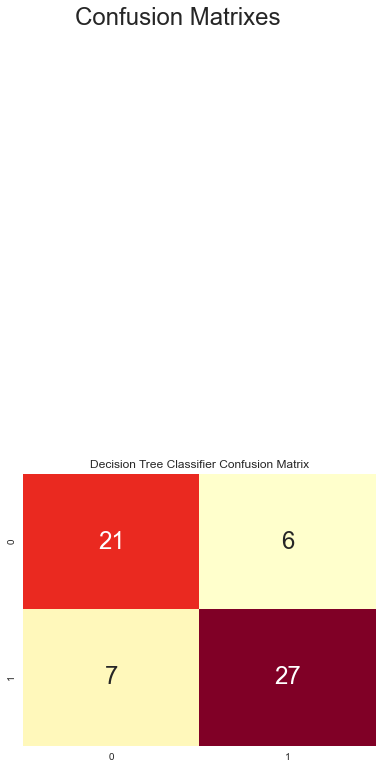

In [445]:
#Confusion matrix for Decision tree classifier
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix") # Plot title.
sns.heatmap(cm_dtc,annot=True,cmap="YlOrRd",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show() # Having a look at the plot

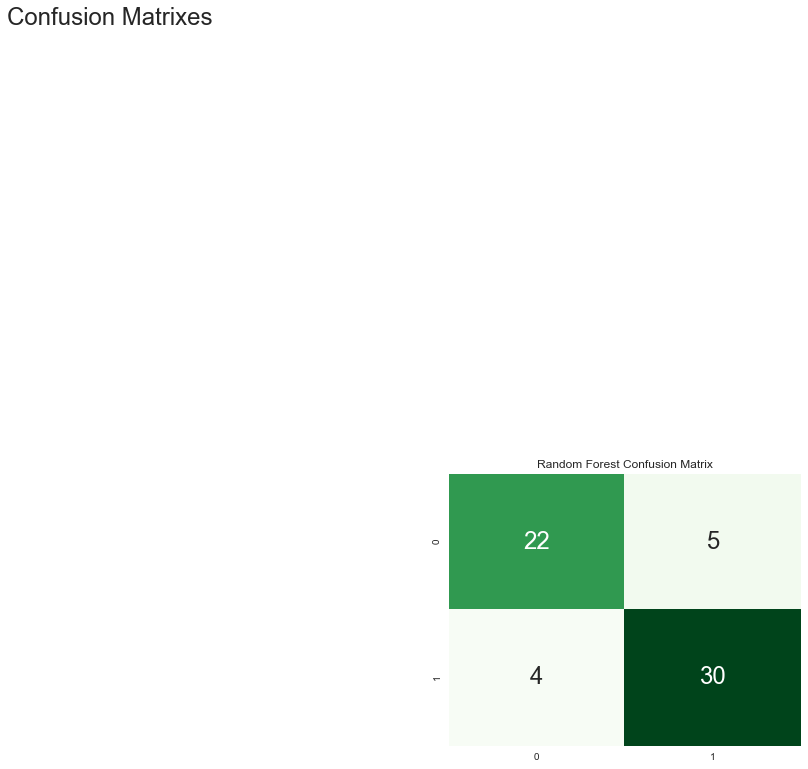

In [446]:
#Confusion matrix for Random Forest Classifier
plt.figure(figsize=(24,12)) # Figure Size
plt.suptitle("Confusion Matrixes",fontsize=24) # Title of the plot
plt.subplots_adjust(wspace = 0.4, hspace= 0.4) # Adjustment of spaces 
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show() # Having a look at the plot

In [447]:
data= pd.read_csv('heart.csv')
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [448]:
# Generalization of all features except target
mean = X.mean(axis=0) 
X -= mean
std = X.std(axis=0)
X /= std

In [449]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [450]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

In [451]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_47 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_48 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [452]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=100, batch_size=10)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.6198 - val_loss: 0.6850 - val_accuracy: 0.7049
Epoch 2/100
242/242 [==============================] - 0s 181us/step - loss: 0.6796 - accuracy: 0.7190 - val_loss: 0.6736 - val_accuracy: 0.7705
Epoch 3/100
242/242 [==============================] - 0s 202us/step - loss: 0.6591 - accuracy: 0.7851 - val_loss: 0.6486 - val_accuracy: 0.7869
Epoch 4/100
242/242 [==============================] - 0s 181us/step - loss: 0.6269 - accuracy: 0.7975 - val_loss: 0.6170 - val_accuracy: 0.7869
Epoch 5/100
242/242 [==============================] - 0s 169us/step - loss: 0.5936 - accuracy: 0.8306 - val_loss: 0.5825 - val_accuracy: 0.7869
Epoch 6/100
242/242 [==============================] - 0s 169us/step - loss: 0.5577 - accuracy: 0.8306 - val_loss: 0.5442 - val_accuracy: 0.8197
Epoch 7/100
242/242 [==============================] - 0s 161us/step - loss: 0.4964 - a

Epoch 57/100
242/242 [==============================] - 0s 140us/step - loss: 0.3213 - accuracy: 0.8802 - val_loss: 0.4034 - val_accuracy: 0.8525
Epoch 58/100
242/242 [==============================] - 0s 161us/step - loss: 0.3099 - accuracy: 0.8884 - val_loss: 0.4026 - val_accuracy: 0.8525
Epoch 59/100
242/242 [==============================] - 0s 148us/step - loss: 0.3110 - accuracy: 0.8967 - val_loss: 0.4030 - val_accuracy: 0.8525
Epoch 60/100
242/242 [==============================] - 0s 153us/step - loss: 0.3181 - accuracy: 0.8760 - val_loss: 0.4022 - val_accuracy: 0.8525
Epoch 61/100
242/242 [==============================] - 0s 157us/step - loss: 0.2971 - accuracy: 0.8884 - val_loss: 0.4044 - val_accuracy: 0.8525
Epoch 62/100
242/242 [==============================] - 0s 152us/step - loss: 0.3342 - accuracy: 0.8884 - val_loss: 0.4092 - val_accuracy: 0.8525
Epoch 63/100
242/242 [==============================] - 0s 157us/step - loss: 0.3241 - accuracy: 0.8719 - val_loss: 0.4086 -

Text(0.5, 1.0, 'Accuracy evolution')

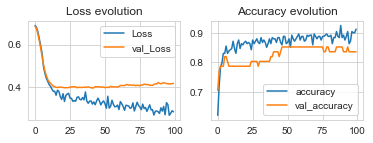

In [453]:
#Plotting loss function with training set and validaton set
plt.subplot(2, 2, 1) # First plot of the two plots
plt.plot(history.history['loss'], label='Loss') # First input variable for line graph(loss)
plt.plot(history.history['val_loss'], label='val_Loss') # second input variable for line graph(val_loss)
plt.legend()
plt.title('Loss evolution')

#Plotting accuracy with training and validation set
plt.subplot(2, 2, 2) 
plt.plot(history.history['accuracy'], label='accuracy') # First input variable for line graph(accuracy)
plt.plot(history.history['val_accuracy'], label='val_accuracy') # second input variable for line graph(val_accuracy)
plt.legend()
plt.title('Accuracy evolution')

In [454]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

